Визначити фрактальну розмірність фрактала на площині, що складається з 
точок (𝑥; 𝑦), де 𝑥 ∈ [0; 1], 𝑦 ∈ [0; 1], причому в системі числення за основою 
5 в записі числа 𝑥 відсутні цифри 1 та 3, а в записі числа 𝑦 відсутні цифри 0, 2 
та 4.

In [128]:
import matplotlib.pyplot as plt
import numpy as np


In [129]:
def numberToBase(n, b):
    if n == 0:
        return [0]
    digits = []
    while n:
        digits.append(int(n % b))
        n //= b
    return digits[::-1]

In [130]:
def num_to_base_5_str(n):
    return "".join(str(i) for i in numberToBase(n, 5))

In [131]:
def create_fractions(iterations):
    matrix = np.array([[1], [1]])
    scale = 1
    fig, ax = plt.subplots(iterations+1, figsize=(20, 4*iterations))
    for it in range(iterations):
        # ax[it].imshow(matrix)
        ax[it].imshow([np.reshape(matrix, matrix.size)]*scale*10**(it))
        ax[it].set_title(f"Ітерація №{it}")
        matrix = np.array([[matrix, 0*matrix, matrix, 0*matrix, matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix, 0*matrix], [0*matrix, matrix, 0*matrix, matrix, 0*matrix, 0*matrix, matrix, 0*matrix, matrix, 0*matrix]])
    ax[-1].imshow([np.reshape(matrix, matrix.size)]*scale*10**(it+1))
    ax[-1].set_title(f"Ітерація №{iterations}")
    # return np.linspace(0, 1, matrix.size)*np.reshape(matrix, matrix.size)

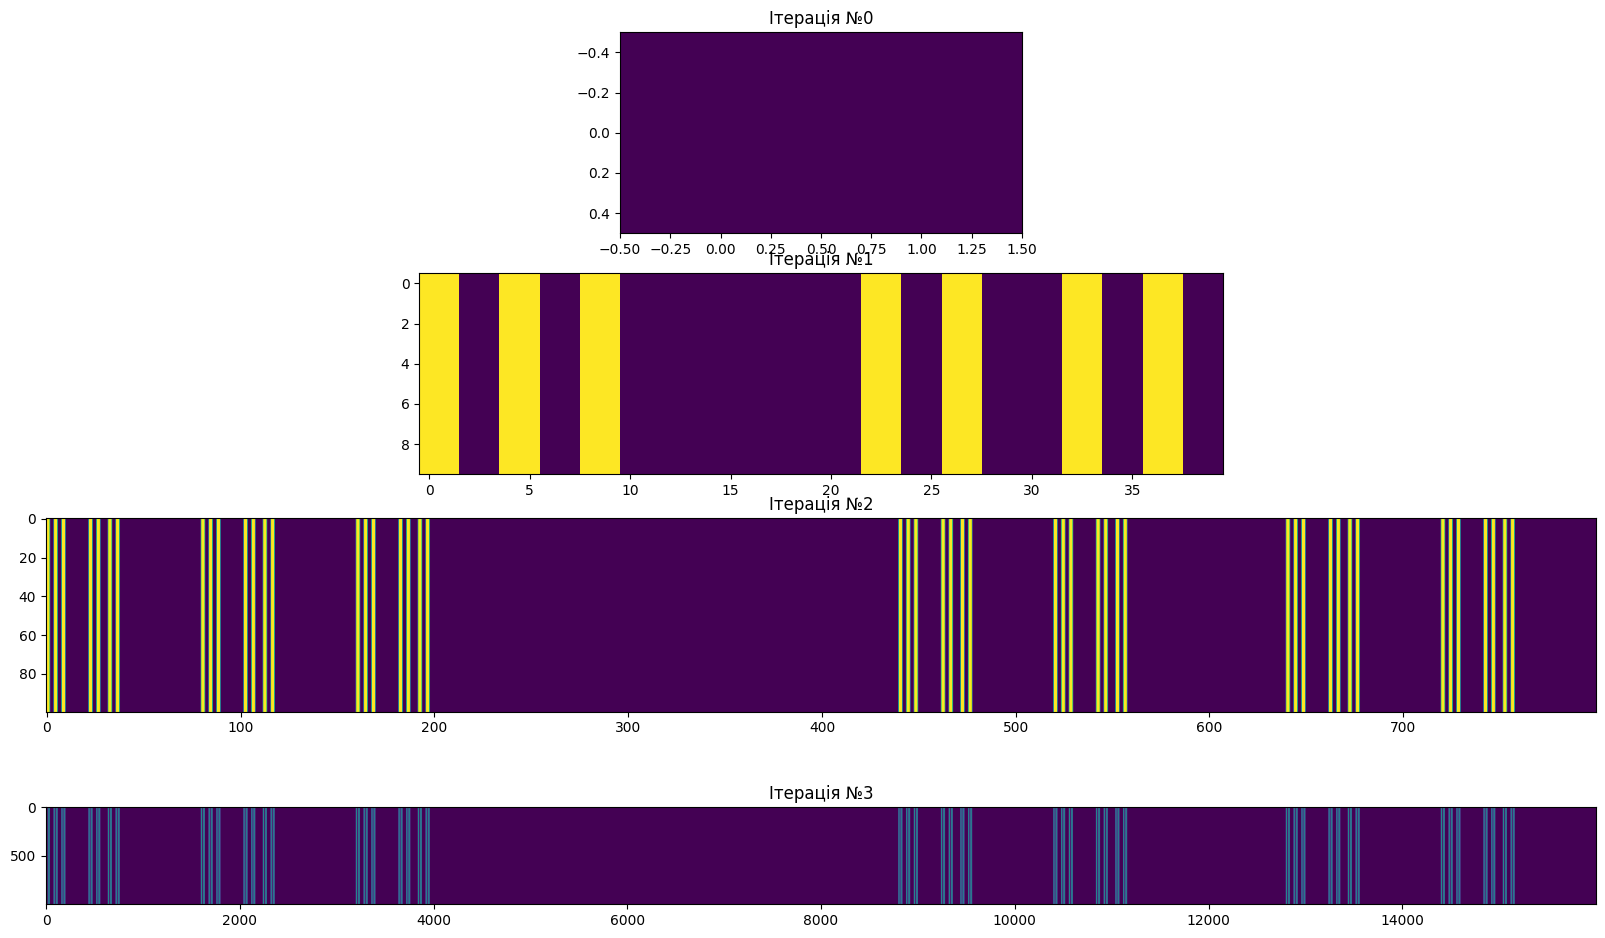

In [132]:
create_fractions(3)